# Introduction to Computational Thinking


Computational thinking allows us to estimate solutions to physics problems using simpler concepts. 

## A simple example

As a first example, lets consider motion with constant acceleration. The displacement of an object moving in a straight line with constant acceleration over some period of time is a well known equation:

$\Delta x = v_0 t + \frac{1}{2} at^2$

Here $\Delta x$ is the displacment of the object (how far away is the object from where it started). $v_0$ is the initial velocity of the object. $a$ is the acceleration of the object. $t$ is the time period.

### Solving a problem exactly using physics equations

Lets condider the following problem: If an object starts at rest and accelerates at 2 m/s$^2$ for 10 seconds, how far does it travel?

We can solve this exactly using the equation above:

$\Delta x = v_0 t + \frac{1}{2} at^2 = 0 + \frac{1}{2}(2~\text{m/s}^2) (10 ~\text{s})^2 = 100 ~\text{m}$.

### Conceptual understanding and mis-understanding

The problem solution above was a simple "plug and chug" solution. Our hope is that our students develop a deeper conceptual understanding of this equation. 

Most students demonstrate a good conceptual understanding of the first term in this equation  ($v_0 t$). This is motion with constant velocity. If an object travels at 15 m/s for 3 seconds it will travel 45 meters. 

In my experience students struggle understanding conceptually the $\frac{1}{2} at^2$ term. When accelerating, your velocity changes so the the distance you travel each second changes. One method of improving this conceptual understanding is to utilize computational thinking and programming. 

### Solving the problem numerically using more simple physics equations 

Repeat the problem: If an object starts at rest and accelerates at 2 m/s$^2$ for 10 seconds, how far does it travel?

To solve this problem using computational thinking we can use two more simple equations:

1. Displacement with constant velocity: $\Delta x = v t$. Or describing this equation in words:  displacement = velocity $\times$ time
2. Definition of acceleration $a = \frac{\Delta v}{\Delta t}$. Or describing this equation in words:  Acceleration = the change in velocity divided by the time interval.

If we break this 10 second interval up into many tiny time steps, we can ignore the  $\frac{1}{2} at^2$ term (if the time step is a fraction of a second, then squaring the time will make this term tiny). The numerical solution then becomes a simple iteration:

First, determine how much the velocity of an object will change during a time interval. We can do this using equation 2. The change in the velocity of an object is equal to the acceleration multiplied by the time interval.

Next, we determine how far the object will travel during that time interval moving at that assumed constant speed. This is simplly equation 1, displacement = velocity $\times$ time.

We iterate over many time intervals throughout the the entire time period. For each interval we determine the new velocity then determine how far we travel during that time interval. 

This method is not exact. A small error is introduced in each time step. If we make the time step smaller we increase the computational time but minimize the error.  

Even though this method does not give an exact answer, there are a few advantages to the method:
   - Improved conceptual understanding of the physics
   - Ability to expand the problem to solve more complicated problems
   
   
### Code example

Lets try solving the problem above with the exact method and the numerical method:

Repeat the problem: If an object starts at rest and accelerates at 2 m/s$^2$ for 10 seconds, how far does it travel?


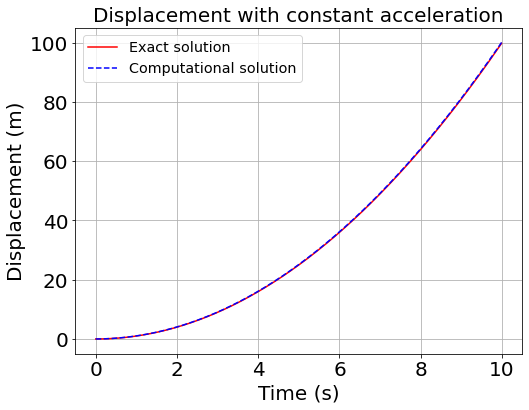

In [23]:
import numpy as np
import matplotlib.pyplot as plt

#Define our funcitons
def displacement_constant_a(a,t):   #Exact solution displacement for motion with constant acceleration and zero initial velocity
   return 0.5*a*t**2

def displacement_constant_v(v,t):   #Displacement for constant velocity (no acceleration)
   return v*t

def velocity_change(a,t):   # Calculate the change in the velocity of an object due to acceleration during a short time interval
   return a*t

# Create an array of times
time_step = 0.01 # units = seconds
t = np.arange(0, 10, time_step)

# Define initial velocity and position
velocity = 0 
position = 0

# Define constants
acceleration = 2 # units m/s^2

# Define an empty list of positions. We will append to this list in order to track and plot the position after each time step.
positions = []

# Perform method 2 (numerical solution)

# Iterate over the entire time interval
for time in t:
    
    # Calculate how much the velocity of the object will change due to the acceleration during this time interval
    #   Use equation change in velocity  = acceleration * time
    #   Example, if the acceleraiton is 2 and the time step is 0.1 seconds, the change in the velocity will be 0.2 m/s.
    delta_v = velocity_change(acceleration,time_step)   
    
    # Update the previous velocity to include the change in velocity due to acceleration
    velocity = velocity + delta_v 
    
    # Calculate the displacement during this short time interval due to moving at the velocity calculated above
    displacement = displacement_constant_v(velocity,time_step)
    
    # Update the current position of the object to incude the displacement due to the current velocity during this time interval
    position = position + displacement
    
    # Save the current position in a list
    positions.append(position)
    
    
# Plot
plt.figure(figsize=(8,6))
plt.plot(t, displacement_constant_a(acceleration,t), color='red', label = "Exact solution") # Compute and plot method 1
plt.plot(t, positions, "--", color='blue', label = "Computational solution") # Plot method 2
plt.legend(loc='upper left', fontsize='x-large')
plt.xlabel("Time (s)"      , fontsize=20)
plt.ylabel("Displacement (m)"      , fontsize=20)
plt.title('Displacement with constant acceleration', fontsize=20)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=20) 
plt.show()  

## An example of increasing complexity

Computational thinking allows one to increase model complexity and accuracy without making the problem solving more intractable. 

### Dropping a ball from a tower with constant gravity and no drag

Exact solution:

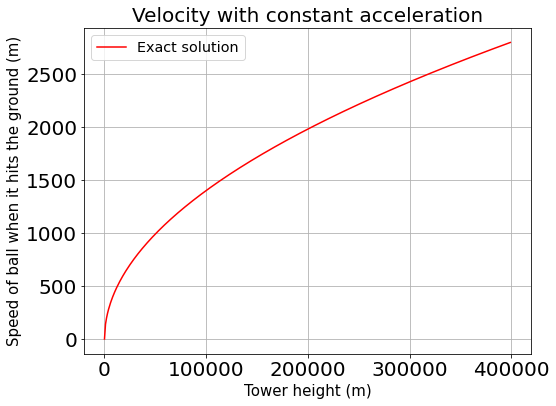

In [24]:
def velocity_constant_a(a,velocity_initial,delta_x):   #Velocity for motion with constant acceleration 
   return np.sqrt(velocity_initial**2 + 2*a*delta_x)

height_array = np.arange(0,400000,1000 ) #unit m

# Calculate the final velocity for every height stored in the building height array
final_velocity_array = velocity_constant_a(9.81,0,height_array)

plt.figure(figsize=(8,6))
plt.plot(height_array, final_velocity_array, color='red', label = "Exact solution") 
plt.legend(loc='upper left', fontsize='x-large')
plt.xlabel("Tower height (m)"      , fontsize=15)
plt.ylabel("Speed of ball when it hits the ground (m)"      , fontsize=15)
plt.title('Velocity with constant acceleration', fontsize=20)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=20) 
plt.show()  

Computational solution:

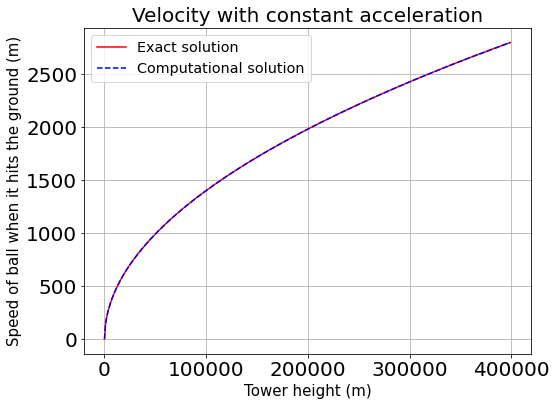

In [25]:
import numpy as np
import matplotlib.pyplot as plt

#Define our funcitons

def displacement_constant_v(v,t):   # Displacement for constant velocity (no acceleration)
   return v*t

def velocity_change(a,t):   # Displacement for constant velocity (no acceleration)
   return a*t

def f_grav( m_object, g):  # Force of gravity on an object near the surface of the earth
    return -m_object*g 

# Utilize a small time step
time_step = 0.01 # units = seconds

# Define constants
g    = 9.81       # acceleration due to gravity [m/s^2]
mass = 1 # [kg]

# Define an empty list of final velocities. We will append to this list in order to track the final velocity reached by the ball for each height.
list_of_final_velocities = []

# Perform method 2 (numerical solution)
#  Iterate over many different heights
#  For each height, track the motion of the ball as it falls by repeatedly 
#    applying physics motion equations over many small time steps until the ball hits the ground

for height in height_array: # Iterate over many different possible starting heights for the ball
    y_position = height     # Set the initial y_position of the ball to be the starting height
    velocity = 0            # Set the initial velocity of the ball to be zero (we are dropping the ball)
    while y_position > 0:   # This code will repeat until the ball hits the ground (defined to be y=0)
            
        net_force =  f_grav(mass,g) 
        acceleration = net_force/mass
    
        # Update the previous velocity to include the change in velocity due to acceleration
        velocity = velocity + velocity_change(acceleration,time_step) 
        
        # Update the current position of the object to incude the displacement due to the current velocity during this time interval
        y_position = y_position + displacement_constant_v(velocity,time_step)

    list_of_final_velocities.append(velocity)
    
    
# Plot
plt.figure(figsize=(8,6))
plt.plot(height_array, final_velocity_array, color='red', label = "Exact solution") 
plt.plot(height_array, np.fabs(list_of_final_velocities), "--", color='blue', label = "Computational solution") # Plot method 2
plt.legend(loc='upper left', fontsize='x-large')
plt.xlabel("Tower height (m)"      , fontsize=15)
plt.ylabel("Speed of ball when it hits the ground (m)"      , fontsize=15)
plt.title('Velocity with constant acceleration', fontsize=20)
plt.grid(True)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=20) 
plt.show()  


### Dropping a ball from a tower with simple drag

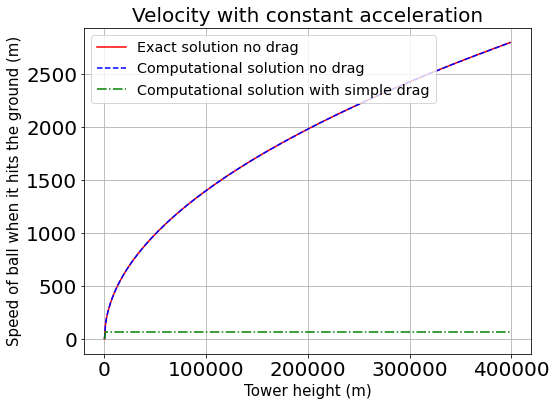

In [26]:
import numpy as np
import matplotlib.pyplot as plt

#Define our funcitons

def displacement_constant_v(v,t):   #Displacement for constant velocity (no acceleration)
   return v*t

def velocity_change(a,t):   #Displacement for constant velocity (no acceleration)
   return a*t

def f_drag(C_drag,v):   #Displacement for constant velocity (no acceleration)
   return C_drag*v**2

# Utilize a small time step
time_step = 0.1 # units = seconds

# Define constants
mass = 100.0        # [kg]
g    = 9.81       # acceleration due to gravity [m/s^2]
rho  = 1.22       # air density [kg/m^3]
D    = 0.47       # Drag coefficient
R    = 0.5       # Radius of sphere [m]
# Define an empty list of positions. We will append to this list in order to track and plot the position after each time step.

positions = []
list_of_final_velocities_with_drag = []

# Perform method 2 (numerical solution)

for height in height_array:
    y_position = height
    velocity = 0
    while y_position > 0:
        
        drag_constant =  (rho*D*np.pi*R**2)/2
        
        net_force = -mass*g + f_drag(drag_constant,velocity)
        acceleration = net_force/mass
        
        #print(velocity,acceleration,velocity_change(acceleration,time_step))
              
        # Update the previous velocity to include the change in velocity due to acceleration
        velocity = velocity + velocity_change(acceleration,time_step) 
    
        # Update the current position of the object to incude the displacement due to the current velocity during this time interval
        y_position = y_position + displacement_constant_v(velocity,time_step)
    

    #print("Height ", height, "Final velocity",velocity)
    list_of_final_velocities_with_drag.append(velocity)
    
    
    
# Plot
plt.figure(figsize=(8,6))
plt.plot(height_array, final_velocity_array, color='red', label = "Exact solution no drag") 
plt.plot(height_array, np.fabs(list_of_final_velocities), "--", color='blue', label = "Computational solution no drag") # Plot method 2
plt.plot(height_array, np.fabs(list_of_final_velocities_with_drag), "-.", color='green', label = "Computational solution with simple drag") # Plot method 2
plt.legend(loc='upper left', fontsize='x-large')
plt.xlabel("Tower height (m)"      , fontsize=15)
plt.ylabel("Speed of ball when it hits the ground (m)"      , fontsize=15)
plt.title('Velocity with constant acceleration', fontsize=20)
plt.grid(True)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=20) 
plt.show()  

### Dropping a ball from a tower with no drag, variable g

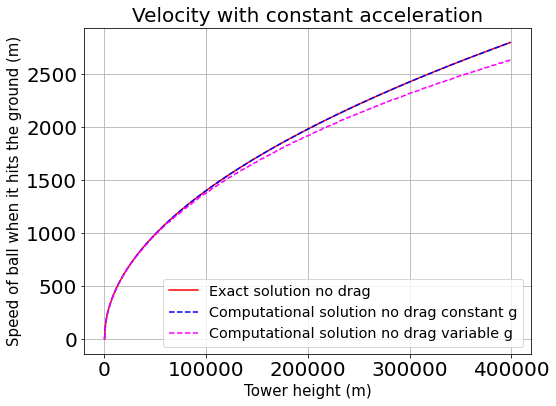

In [27]:


import numpy as np
import matplotlib.pyplot as plt

#Define our funcitons

def displacement_constant_v(v,t):   #Displacement for constant velocity (no acceleration)
   return v*t

def velocity_change(a,t):   #Displacement for constant velocity (no acceleration)
   return a*t

def f_drag(C_drag,v):   #Displacement for constant velocity (no acceleration)
   return C_drag*v**2

def f_grav(G, M_Earth, m_object,R_Earth, height_above_surface):
    return -G * M_Earth * m_object / (R_Earth + height_above_surface)**2

# Utilize a small time step
time_step = 1 # units = seconds

# Define constants
mass = 100.0        # [kg]
rho  = 1.22       # air density [kg/m^3]
D    = 0.47       # Drag coefficient
R    = 0.5       # Radius of sphere [m]
G    = 6.6743 * 10**(-11) #Gravitational constant [m^3 kg^-1 s^-2]
M_Earth = 5.972 * 10**24     #Mass of the Earth [kg]
R_Earth = 6.3781 * 10**6 #Radius of the Earth [m]

# Define an empty list of positions. We will append to this list in order to track and plot the position after each time step.

positions = []
list_of_final_velocities_with_no_drag_and_variable_Fgrav = []

# Perform method 2 (numerical solution)

for height in height_array:
    y_position = height
    velocity = 0
    
    while y_position > 0:
        
        drag_constant =  (rho*D*np.pi*R**2)/2
        
        net_force = f_grav(G, M_Earth, mass, R_Earth, height) #+ f_drag(drag_constant,velocity)
        acceleration = net_force/mass
        #print(f_grav(G, M_Earth, mass, R_Earth, height),mass*9.81 )
        #print(velocity,acceleration,velocity_change(acceleration,time_step))
              
        # Update the previous velocity to include the change in velocity due to acceleration
        velocity = velocity + velocity_change(acceleration,time_step) 
    
        # Update the current position of the object to incude the displacement due to the current velocity during this time interval
        y_position = y_position + displacement_constant_v(velocity,time_step)
    

    #print("Height ", height, "Final velocity",velocity)
    list_of_final_velocities_with_no_drag_and_variable_Fgrav.append(velocity)
    
    
    
# Plot
plt.figure(figsize=(8,6))
plt.plot(height_array, final_velocity_array, color='red', label = "Exact solution no drag") 
plt.plot(height_array, np.fabs(list_of_final_velocities), "--", color='blue', label = "Computational solution no drag constant g") # Plot method 2
plt.plot(height_array, np.fabs(list_of_final_velocities_with_no_drag_and_variable_Fgrav), "--", color='magenta', label = "Computational solution no drag variable g") # Plot method 2
plt.legend(loc='lower right', fontsize='x-large')
plt.xlabel("Tower height (m)"      , fontsize=15)
plt.ylabel("Speed of ball when it hits the ground (m)"      , fontsize=15)
plt.title('Velocity with constant acceleration', fontsize=20)
plt.grid(True)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=20) 
plt.show()

### Dropping a ball from a tower with drag, variable g

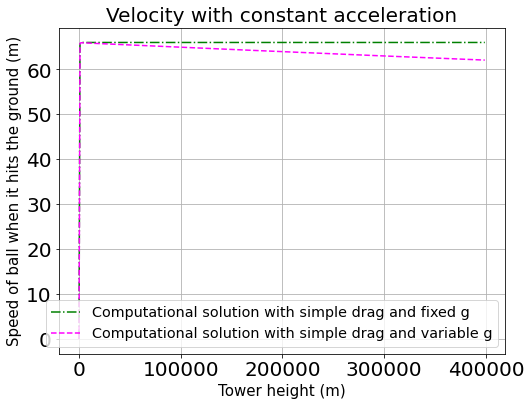

In [28]:

import numpy as np
import matplotlib.pyplot as plt

#Define our funcitons

def displacement_constant_v(v,t):   #Displacement for constant velocity (no acceleration)
   return v*t

def velocity_change(a,t):   #Displacement for constant velocity (no acceleration)
   return a*t

def f_drag(C_drag,v):   #Displacement for constant velocity (no acceleration)
   return C_drag*v**2

def f_grav(G, M_Earth, m_object,R_Earth, height_above_surface):
    return -G * M_Earth * m_object / (R_Earth + height_above_surface)**2

# Utilize a small time step
time_step = 1 # units = seconds

# Define constants
mass = 100.0        # [kg]
rho  = 1.22       # air density [kg/m^3]
D    = 0.47       # Drag coefficient
R    = 0.5       # Radius of sphere [m]
G    = 6.6743 * 10**(-11) #Gravitational constant [m^3 kg^-1 s^-2]
M_Earth = 5.972 * 10**24     #Mass of the Earth [kg]
R_Earth = 6.3781 * 10**6 #Radius of the Earth [m]

# Define an empty list of positions. We will append to this list in order to track and plot the position after each time step.

positions = []
list_of_final_velocities_with_drag_and_variable_Fgrav = []

# Perform method 2 (numerical solution)

for height in height_array:
    y_position = height
    velocity = 0
    
    while y_position > 0:
        
        drag_constant =  (rho*D*np.pi*R**2)/2
        
        net_force = f_grav(G, M_Earth, mass, R_Earth, height) + f_drag(drag_constant,velocity)
        acceleration = net_force/mass
        #print(f_grav(G, M_Earth, mass, R_Earth, height),mass*9.81 )
        #print(velocity,acceleration,velocity_change(acceleration,time_step))
              
        # Update the previous velocity to include the change in velocity due to acceleration
        velocity = velocity + velocity_change(acceleration,time_step) 
    
        # Update the current position of the object to incude the displacement due to the current velocity during this time interval
        y_position = y_position + displacement_constant_v(velocity,time_step)
    

    #print("Height ", height, "Final velocity",velocity)
    list_of_final_velocities_with_drag_and_variable_Fgrav.append(velocity)
    
    
    
# Plot
plt.figure(figsize=(8,6))
plt.plot(height_array, np.fabs(list_of_final_velocities_with_drag), "-.", color='green', label = "Computational solution with simple drag and fixed g") # Plot method 2
plt.plot(height_array, np.fabs(list_of_final_velocities_with_drag_and_variable_Fgrav), "--", color='magenta', label = "Computational solution with simple drag and variable g") # Plot method 2
plt.legend(loc='lower right', fontsize='x-large')
plt.xlabel("Tower height (m)"      , fontsize=15)
plt.ylabel("Speed of ball when it hits the ground (m)"      , fontsize=15)
plt.title('Velocity with constant acceleration', fontsize=20)
plt.grid(True)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=20) 
plt.show()

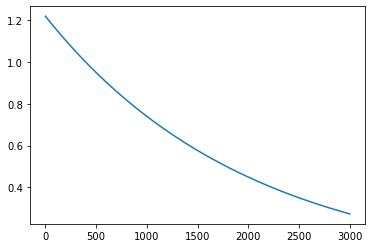

In [41]:

# THIS IS WRONG
# This is a very approximate equation for the variaion of atmospheric density with altitude 
def density(y):
    return 1.22*np.exp(-0.0005*y)

heights=np.linspace(0,3000,100)
plt.plot(heights ,density(heights))

<Figure size 576x432 with 0 Axes>

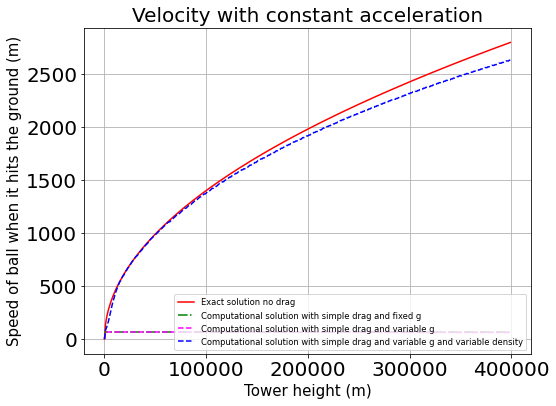

In [47]:

import numpy as np
import matplotlib.pyplot as plt

#Define our funcitons

def displacement_constant_v(v,t):   #Displacement for constant velocity (no acceleration)
   return v*t

def velocity_change(a,t):   #Displacement for constant velocity (no acceleration)
   return a*t

def f_drag(C_drag,v):   #Displacement for constant velocity (no acceleration)
   return C_drag*v**2

def f_grav(G, M_Earth, m_object,R_Earth, height_above_surface):
    return -G * M_Earth * m_object / (R_Earth + height_above_surface)**2

# Utilize a small time step
time_step = 1 # units = seconds

# Define constants
mass = 100.0        # [kg]
rho  = 1.22       # air density [kg/m^3]
D    = 0.47       # Drag coefficient
R    = 0.5       # Radius of sphere [m]
G    = 6.6743 * 10**(-11) #Gravitational constant [m^3 kg^-1 s^-2]
M_Earth = 5.972 * 10**24     #Mass of the Earth [kg]
R_Earth = 6.3781 * 10**6 #Radius of the Earth [m]

# Define an empty list of positions. We will append to this list in order to track and plot the position after each time step.

positions = []
list_of_final_velocities_with_drag_and_variable_Fgrav_varRho = []

# Perform method 2 (numerical solution)

for height in height_array:
    y_position = height
    velocity = 0
    
    while y_position > 0:
        
        drag_constant =  (density(height)*D*np.pi*R**2)/2
        
        force = f_grav(G, M_Earth, mass, R_Earth, height) + f_drag(drag_constant,velocity)
        acceleration = force/mass
        #print(f_grav(G, M_Earth, mass, R_Earth, height),mass*9.81 )
        #print(velocity,acceleration,velocity_change(acceleration,time_step))
              
        # Update the previous velocity to include the change in velocity due to acceleration
        velocity = velocity + velocity_change(acceleration,time_step) 
    
        # Update the current position of the object to incude the displacement due to the current velocity during this time interval
        y_position = y_position + displacement_constant_v(velocity,time_step)
    

    #print("Height ", height, "Final velocity",velocity)
    list_of_final_velocities_with_drag_and_variable_Fgrav_varRho.append(velocity)
    
    
    
# Plot
plt.figure(figsize=(8,6))
plt.figure(figsize=(8,6))
plt.plot(height_array, final_velocity_array, color='red', label = "Exact solution no drag") 

plt.plot(height_array, np.fabs(list_of_final_velocities_with_drag), "-.", color='green', label = "Computational solution with simple drag and fixed g") # Plot method 2
plt.plot(height_array, np.fabs(list_of_final_velocities_with_drag_and_variable_Fgrav), "--", color='magenta', label = "Computational solution with simple drag and variable g") # Plot method 2
plt.plot(height_array, np.fabs(list_of_final_velocities_with_drag_and_variable_Fgrav_varRho), "--", color='blue', label = "Computational solution with simple drag and variable g and variable density") # Plot method 2
plt.legend(loc='lower right', fontsize='small')
plt.xlabel("Tower height (m)"      , fontsize=15)
plt.ylabel("Speed of ball when it hits the ground (m)"      , fontsize=15)
plt.title('Velocity with constant acceleration', fontsize=20)
plt.grid(True)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=20) 
plt.show()
